In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/pima-indians-diabetes-database",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/ft/b8999z9j0txg6lq7z7hkvx3m0000gn/T/ipykernel_89786/2709689075.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 23.3k/23.3k [00:00<00:00, 16.7MB/s]

First 5 records:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:
features = list(df.columns)[:-1]
label = "Outcome"
features, label

(['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age'],
 'Outcome')

In [12]:
X,y = df[features].values, df[label].values

for n in range(0, 4):
    print(f"Patient {n}\n Features: {X[n]}\n Outcome:{y[n]}")

Patient 0
 Features: [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 Outcome:1
Patient 1
 Features: [ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]
 Outcome:0
Patient 2
 Features: [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]
 Outcome:1
Patient 3
 Features: [ 1.    89.    66.    23.    94.    28.1    0.167 21.   ]
 Outcome:0


<function matplotlib.pyplot.show(close=None, block=None)>

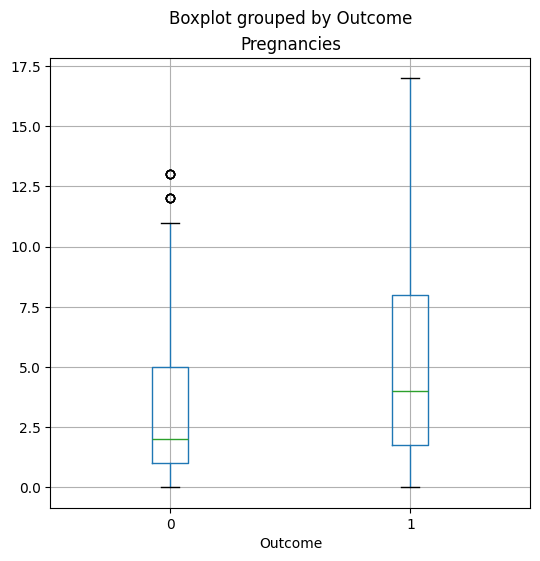

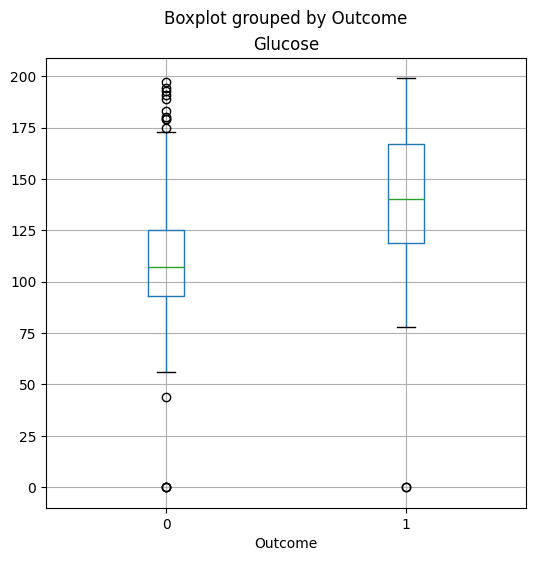

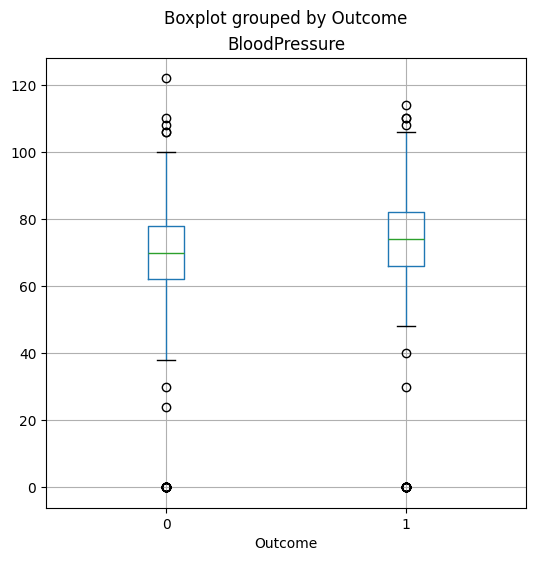

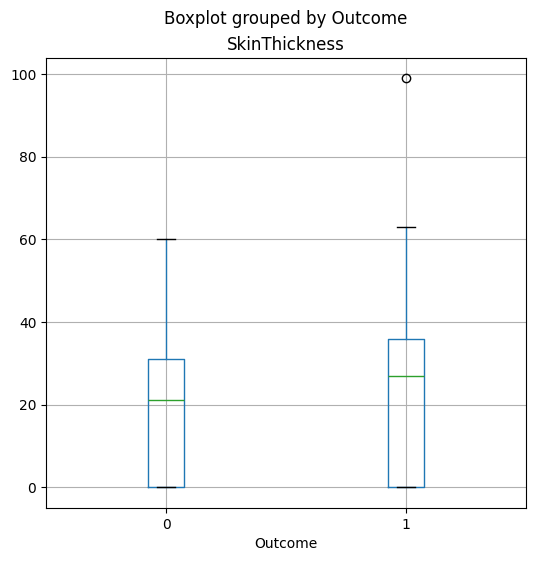

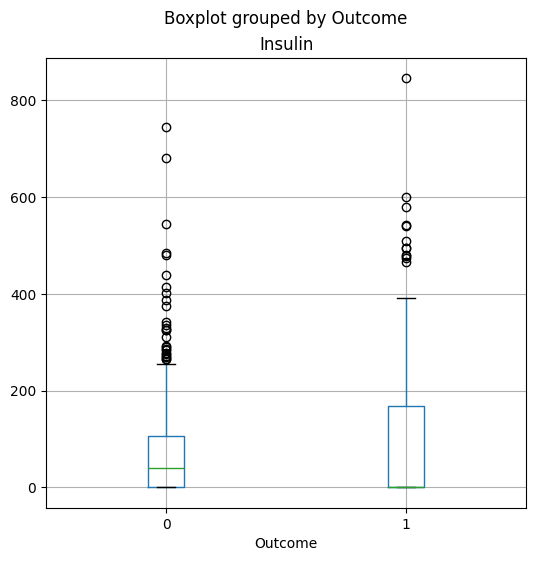

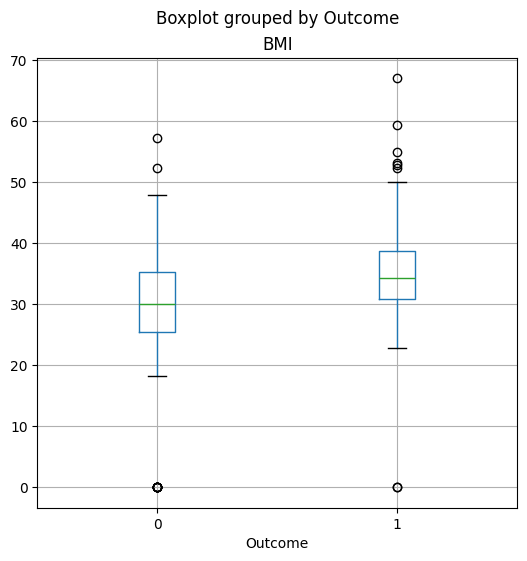

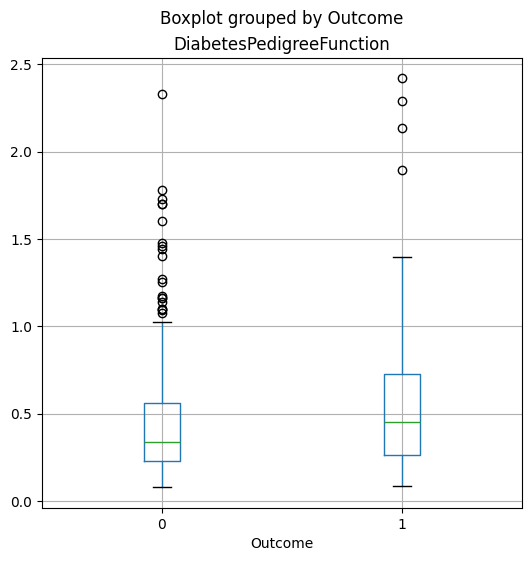

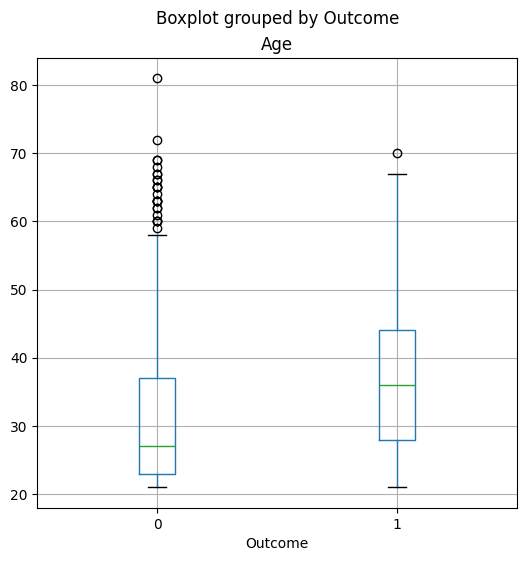

In [13]:
from matplotlib import pyplot as plt

for col in features:
    df.boxplot(column = col, by="Outcome", figsize=(6,6))
    plt.title(col)
plt.show

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print(f"Training Cases = {len(X_train)}\n Testing Cases = {len(X_test)}")

Training Cases = 537
 Testing Cases = 231


In [16]:
#Train and Evaluate Binary Classification Model

from sklearn.linear_model import LogisticRegression

reg = 0.01

model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train,y_train)

LogisticRegression(C=100.0, solver='liblinear')


In [18]:
predictions = model.predict(X_test)
print(f"Predicted Results {predictions}")
print(f"Actual Results {y_test}")
count = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        count += 1
print(f"Correct guesses = {count}")
print(f"Incorrect guesses = {len(predictions) - count}")


Predicted Results [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0]
Actual Results [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]
Correct guesses = 180
Incor

In [19]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

print(f"Precision = {precision_score(y_test, predictions)}")
print(f"Accuracy = {accuracy_score(y_test, predictions)}")
print(f"Recall = {recall_score(y_test, predictions)}")
print(f"F1-score = {f1_score(y_test, predictions)}")

Precision = 0.7090909090909091
Accuracy = 0.7792207792207793
Recall = 0.527027027027027
F1-score = 0.6046511627906976


<function matplotlib.pyplot.show(close=None, block=None)>

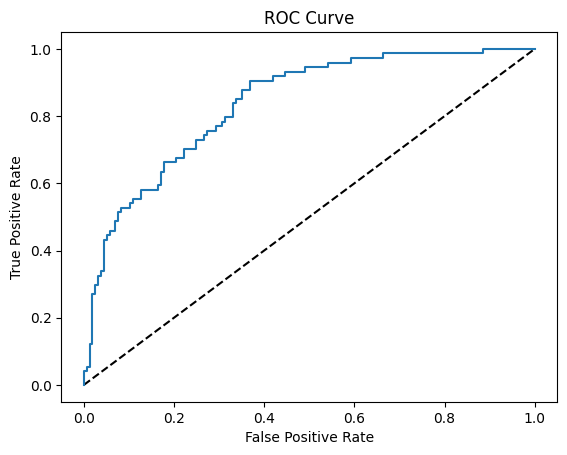

In [23]:
from sklearn.metrics import roc_curve

y_scores = model.predict_proba(X_test)


fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])


#Plot ROC Curve
fig = plt.plot(figsize = (6,6))

#plot diagonal line
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show

In [25]:
#Now implementing preprocessing to see if the model gets any better
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#define proprocessing for numeric columns
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps = [('scalar', StandardScaler())])

categorical_features = [7]
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                             ('logregressor', LogisticRegression(C=1/reg, solver = 'liblinear'))])

model = pipeline.fit(X_train, y_train)


In [26]:
#Test the model
y_pred = model.predict(X_test)

accuracy_score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)

print(f"Accuracy is {accuracy_score}")
print(f"F1 is {f1_score}")
print(f"Precision is {precision_score}")
print(f"Recall is {recall_score}")

Accuracy is 0.7532467532467533
F1 is 0.5777777777777777
Precision is 0.639344262295082
Recall is 0.527027027027027


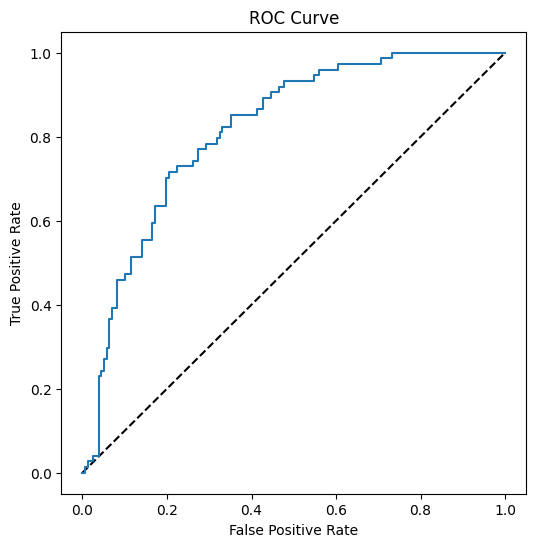

In [28]:
#Looking at this, the model did not perform better when testing. Lets look at the model using the ROC
y_scores = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6,6))

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC Curve")
plt.show()

In [ ]:
#Based on the ROC curve, this model does not do better compared, so instead lets try using a different classfier

#Lets first use a random_forest classifier
from sklearn.ensemble import RandomForestClassifier


pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('logregressor', RandomForestClassifier(n_estimators = 100))])